<a href="https://colab.research.google.com/github/Alisaahy/Fraud_detection_ML_project/blob/master/BBC_News_Category_Classification_Mini_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github link: https://github.com/Alisaahy/PROJECTS-IN-ADVANCED-MACHINE-LEARNING/blob/master/BBC_News_Category_Classification_Mini_Hackathon.ipynb

## 1)  Visualize the categories of your target variable and describe the dataset generally (the data includes news articles from the BBC news.)  A simple description is fine.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Import the data

df = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")

In [0]:
df.text[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

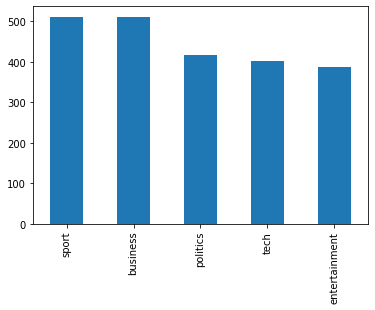

In [0]:
df['category'].value_counts().plot(kind='bar')
plt.show()

In [0]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

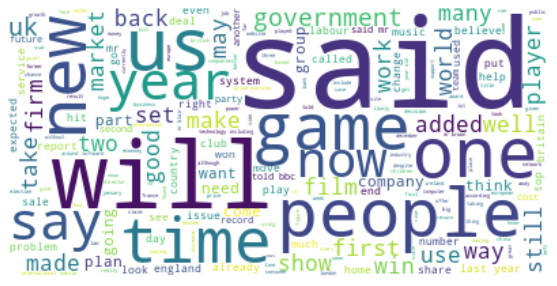

In [0]:
# Display the wordcloud image:

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

word = " ".join(word for word in df.text)
wordcloud1 = WordCloud(background_color="white").generate(word)
plt.figure(figsize=[10,5])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
df['text']

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

### 2) Preprocess your data such that each document in the data is represented as a sequence of equal length.

In [0]:
from sklearn.model_selection import train_test_split
train_samples, test_samples = train_test_split(df, test_size = 0.2, random_state=0)
train_samples.shape

(1780, 2)

In [0]:
texts = train_samples.text

# Encode categorical data
from sklearn.preprocessing import LabelEncoder
labels = train_samples.category
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)

from keras.utils import to_categorical
labels = to_categorical(labels, 5)

In [0]:
x_test = test_samples.text

y_test = test_samples.category
labelencoder = LabelEncoder()
y_test = labelencoder.fit_transform(y_test)

y_test = to_categorical(y_test, 5)

In [0]:
# Tokenize the data into one hot vectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut articles after 100 words
training_samples = 1780  # We will be training on 1780 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # converts words in each text to each word's numeric index in tokenizer dictionary.

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

Found 27262 unique tokens.
Shape of data tensor: (1780, 100)
Shape of label tensor: (1780, 5)


In [0]:
# Tokenize the test data into one hot vectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut articles after 100 words
test_sample = 445  # We will be training on 445 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_test)
sequences = tokenizer.texts_to_sequences(x_test) # converts words in each text to each word's numeric index in tokenizer dictionary.

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data_2 = pad_sequences(sequences, maxlen=maxlen)

y_test = np.asarray(y_test)

print('Shape of data tensor:', data_2.shape)
print('Shape of label tensor:', y_test.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data_2.shape[0])
np.random.shuffle(indices)
data_2 = data_2[indices]
y_test = y_test[indices]

x_test = data[:test_sample]
y_test = labels[:test_sample]

Found 14317 unique tokens.
Shape of data tensor: (445, 100)
Shape of label tensor: (445, 5)


## Can you use the following data to build....?
1. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)
2.  A model using Conv1d Layers
3.  A model with one sequential layer (LSTM or GRU)
4. A model with stacked sequential layers (LSTM or GRU)
- A model with bidirectional sequential layers 






### Model with an embedding layer and dense layers

In [0]:
# Let's start with a model that ignores the sequential steps that make up each observation
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Specify the size of your vocabulary (i.e.-10,000 terms)
# Specify the number of features you want to extract via fitting weights to your embedding matrix.
# We also specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs 
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 100, 8)            80000     
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 4005      
Total params: 84,005
Trainable params: 84,005
Non-trainable params: 0
_________________________________________________________________
Train on 1424 samples, validate on 356 samples
Epoch 1/10


/Users/hengyuai/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1424/1424 [==============================] - 0s 104us/step - loss: 1.6027 - acc: 0.2402 - val_loss: 1.6027 - val_acc: 0.2528
Epoch 2/10
1424/1424 [==============================] - 0s 43us/step - loss: 1.5387 - acc: 0.5962 - val_loss: 1.5780 - val_acc: 0.3708
Epoch 3/10
1424/1424 [==============================] - 0s 37us/step - loss: 1.4429 - acc: 0.7353 - val_loss: 1.5190 - val_acc: 0.4466
Epoch 4/10
1424/1424 [==============================] - 0s 36us/step - loss: 1.2914 - acc: 0.7844 - val_loss: 1.4132 - val_acc: 0.5112
Epoch 5/10
1424/1424 [==============================] - 0s 35us/step - loss: 1.0940 - acc: 0.8617 - val_loss: 1.2760 - val_acc: 0.5534
Epoch 6/10
1424/1424 [==============================] - 0s 36us/step - loss: 0.8862 - acc: 0.8961 - val_loss: 1.1356 - val_acc: 0.6096
Epoch 7/10
1424/1424 [==============================] - 0s 37us/step - loss: 0.6934 - acc: 0.9396 - val_loss: 1.0035 - val_acc: 0.6742
Epoch 8/10
1424/1424 [==============================] - 0s 40us/s

### A model using Conv1d Layers

In [0]:
# Use 1D Conv layer rather than RNN or LSTM or GRU to fit model
# Why? Much lighter model to fit. Here we are training on the full dataset.  If you try
# to build a model using LSTM code after running this one it will be much slower.

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

max_features = 10000
max_len = 100

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='softmax')) 
model.add(layers.MaxPooling1D(5)) #
model.add(layers.Conv1D(32, 7, activation='softmax'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 100, 128)          1280000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 165       
Total params: 1,316,069
Trainable params: 1,316,069
Non-trainable params: 0
___________________________________________

/Users/hengyuai/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/10
1424/1424 [==============================] - 1s 619us/step - loss: 6.4339 - acc: 0.1657 - val_loss: 6.7872 - val_acc: 0.1938
Epoch 2/10
1424/1424 [==============================] - 1s 453us/step - loss: 6.2921 - acc: 0.1657 - val_loss: 6.7461 - val_acc: 0.1938
Epoch 3/10
1424/1424 [==============================] - 1s 417us/step - loss: 6.2820 - acc: 0.1657 - val_loss: 6.7461 - val_acc: 0.1938
Epoch 4/10
1424/1424 [==============================] - 1s 444us/step - loss: 6.2820 - acc: 0.1657 - val_loss: 6.7461 - val_acc: 0.1938
Epoch 5/10
1424/1424 [==============================] - 1s 417us/step - loss: 6.2820 - acc: 0.1657 - val_loss: 6.7461 - val_acc: 0.1938
Epoch 6/10
1424/1424 [==============================] - 1s 424us/step - loss: 6.2820 - acc: 0.1657 - val_loss: 6.7461 - val_acc: 0.1938
Epoch 7/10
1424/1424 [==============================] - 1s 412us/step - loss: 6.2820 - acc: 0.1657 - val_loss: 6.7461 - val_acc: 0.1938
E

### A model with one sequential layer (LSTM or GRU)

In [0]:
# LSTM layer
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

/Users/hengyuai/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/10
1424/1424 [==============================] - 2s 2ms/step - loss: 1.5105 - acc: 0.3378 - val_loss: 1.4106 - val_acc: 0.3764
Epoch 2/10
1424/1424 [==============================] - 2s 1ms/step - loss: 1.1624 - acc: 0.4684 - val_loss: 1.2357 - val_acc: 0.4157
Epoch 3/10
1424/1424 [==============================] - 2s 1ms/step - loss: 0.9894 - acc: 0.5154 - val_loss: 1.0752 - val_acc: 0.5084
Epoch 4/10
1424/1424 [==============================] - 2s 1ms/step - loss: 0.8905 - acc: 0.6060 - val_loss: 1.1252 - val_acc: 0.4860
Epoch 5/10
1424/1424 [==============================] - 2s 1ms/step - loss: 0.8096 - acc: 0.6545 - val_loss: 1.0017 - val_acc: 0.5899
Epoch 6/10
1424/1424 [==============================] - 2s 1ms/step - loss: 0.7038 - acc: 0.7725 - val_loss: 0.8728 - val_acc: 0.6994
Epoch 7/10
1424/1424 [==============================] - 2s 1ms/step - loss: 0.5158 - acc: 0.8968 - val_loss: 0.8560 - val_acc: 0.7219
Epoch 8/10
1424

### A model using an Embedding layer with stacked sequential layers (LSTM or GRU)

In [0]:
# Stacked RNN layers

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

/Users/hengyuai/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/10
1424/1424 [==============================] - 5s 3ms/step - loss: 1.6464 - acc: 0.2198 - val_loss: 1.6676 - val_acc: 0.1826
Epoch 2/10
1424/1424 [==============================] - 3s 2ms/step - loss: 1.5324 - acc: 0.3167 - val_loss: 1.6203 - val_acc: 0.2697
Epoch 3/10
1424/1424 [==============================] - 3s 2ms/step - loss: 1.0045 - acc: 0.6587 - val_loss: 1.7383 - val_acc: 0.3455
Epoch 4/10
1424/1424 [==============================] - 3s 2ms/step - loss: 0.4207 - acc: 0.9087 - val_loss: 1.7575 - val_acc: 0.3708
Epoch 5/10
1424/1424 [==============================] - 4s 3ms/step - loss: 0.1243 - acc: 0.9853 - val_loss: 2.0139 - val_acc: 0.3792
Epoch 6/10
1424/1424 [==============================] - 4s 2ms/step - loss: 0.0275 - acc: 0.9993 - val_loss: 2.1467 - val_acc: 0.4045
Epoch 7/10
1424/1424 [==============================] - 4s 2ms/step - loss: 0.0162 - acc: 0.9965 - val_loss: 2.8826 - val_acc: 0.3006
Epoch 8/10
1424

### A model using an Embedding layer with bidirectional sequential layers

In [0]:
# Bidirectional LSTM

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

/Users/hengyuai/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/10
1424/1424 [==============================] - 2s 1ms/step - loss: 1.6018 - acc: 0.2402 - val_loss: 1.5965 - val_acc: 0.2022
Epoch 2/10
1424/1424 [==============================] - 1s 577us/step - loss: 1.5378 - acc: 0.3778 - val_loss: 1.3942 - val_acc: 0.4073
Epoch 3/10
1424/1424 [==============================] - 1s 545us/step - loss: 1.1509 - acc: 0.5787 - val_loss: 1.2065 - val_acc: 0.5084
Epoch 4/10
1424/1424 [==============================] - 1s 543us/step - loss: 0.9266 - acc: 0.6250 - val_loss: 1.2532 - val_acc: 0.5309
Epoch 5/10
1424/1424 [==============================] - 1s 541us/step - loss: 0.8057 - acc: 0.6440 - val_loss: 1.0138 - val_acc: 0.5506
Epoch 6/10
1424/1424 [==============================] - 1s 578us/step - loss: 0.6905 - acc: 0.6910 - val_loss: 1.0211 - val_acc: 0.5646
Epoch 7/10
1424/1424 [==============================] - 1s 562us/step - loss: 0.6320 - acc: 0.6959 - val_loss: 1.0919 - val_acc: 0.5899
Epo

### Now retrain your best model from C, D, and E using dropout (you may need to increase epochs!).

In [0]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

In [0]:
# C
from keras.layers import SimpleRNN, LSTM
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

/Users/hengyuai/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/20
1424/1424 [==============================] - 3s 2ms/step - loss: 1.5982 - acc: 0.2619 - val_loss: 1.5929 - val_acc: 0.2500
Epoch 2/20
1424/1424 [==============================] - 2s 1ms/step - loss: 1.4627 - acc: 0.4199 - val_loss: 1.3351 - val_acc: 0.4017
Epoch 3/20
1424/1424 [==============================] - 2s 1ms/step - loss: 1.2573 - acc: 0.4754 - val_loss: 1.2521 - val_acc: 0.4129
Epoch 4/20
1424/1424 [==============================] - 2s 1ms/step - loss: 1.1572 - acc: 0.5204 - val_loss: 1.2592 - val_acc: 0.4298
Epoch 5/20
1424/1424 [==============================] - 2s 1ms/step - loss: 1.1102 - acc: 0.5569 - val_loss: 1.1328 - val_acc: 0.5449
Epoch 6/20
1424/1424 [==============================] - 2s 1ms/step - loss: 0.9712 - acc: 0.6236 - val_loss: 1.0877 - val_acc: 0.6236
Epoch 7/20
1424/1424 [==============================] - 2s 1ms/step - loss: 0.8625 - acc: 0.6805 - val_loss: 1.0033 - val_acc: 0.6433
Epoch 8/20
1424

In [0]:
# D

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

/Users/hengyuai/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/20
1424/1424 [==============================] - 5s 3ms/step - loss: 1.6963 - acc: 0.2058 - val_loss: 1.6358 - val_acc: 0.1910
Epoch 2/20
1424/1424 [==============================] - 4s 3ms/step - loss: 1.6407 - acc: 0.2149 - val_loss: 1.6319 - val_acc: 0.2051
Epoch 3/20
1424/1424 [==============================] - 4s 2ms/step - loss: 1.6256 - acc: 0.2219 - val_loss: 1.6372 - val_acc: 0.1994
Epoch 4/20
1424/1424 [==============================] - 4s 3ms/step - loss: 1.6141 - acc: 0.2423 - val_loss: 1.6420 - val_acc: 0.2191
Epoch 5/20
1424/1424 [==============================] - 4s 2ms/step - loss: 1.6163 - acc: 0.2177 - val_loss: 1.6144 - val_acc: 0.1966
Epoch 6/20
1424/1424 [==============================] - 4s 2ms/step - loss: 1.5977 - acc: 0.2388 - val_loss: 1.6121 - val_acc: 0.2388
Epoch 7/20
1424/1424 [==============================] - 3s 2ms/step - loss: 1.5672 - acc: 0.2795 - val_loss: 1.6480 - val_acc: 0.1966
Epoch 8/20
1424

In [0]:
from keras.layers import Dropout
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

/Users/hengyuai/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1424 samples, validate on 356 samples
Epoch 1/20
1424/1424 [==============================] - 2s 1ms/step - loss: 1.5989 - acc: 0.2598 - val_loss: 1.5726 - val_acc: 0.3876
Epoch 2/20
1424/1424 [==============================] - 1s 574us/step - loss: 1.4572 - acc: 0.4445 - val_loss: 1.3394 - val_acc: 0.3989
Epoch 3/20
1424/1424 [==============================] - 1s 532us/step - loss: 1.1633 - acc: 0.5316 - val_loss: 1.1975 - val_acc: 0.5449
Epoch 4/20
1424/1424 [==============================] - 1s 552us/step - loss: 0.9668 - acc: 0.6643 - val_loss: 1.1481 - val_acc: 0.5618
Epoch 5/20
1424/1424 [==============================] - 1s 537us/step - loss: 0.8698 - acc: 0.6545 - val_loss: 1.1057 - val_acc: 0.5506
Epoch 6/20
1424/1424 [==============================] - 1s 553us/step - loss: 0.7924 - acc: 0.6699 - val_loss: 1.0108 - val_acc: 0.6461
Epoch 7/20
1424/1424 [==============================] - 1s 563us/step - loss: 0.6836 - acc: 0.7647 - val_loss: 1.0965 - val_acc: 0.6545
Epo

### Discuss 1) which model(s) performed best and speculate about 2) how you might try to further improve the predictive power of your model (e.g. Glove embeddings? More layers? Combining Conv1D with LSTM layers? More LSTM hidden nodes?)

Generally speaking, the model using an embedding layer with stacked sequential layers works the best. It has the lowest test score and highest test accuracy.

I will try to do Glove embedding to improve my model.